In [2]:
###PYTHON NOTEBOOK FOR VISUALIZATION OF FIGURES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score
from scipy.stats import linregress

In [4]:
#RANDOM SAMPLING FOR W SWEEP
from scipy.stats import qmc
import pandas as pd
sampler = qmc.LatinHypercube(d=4)
sample = sampler.random(n=10000)
l_bounds = [10E-8, 10E-7, 10E-6, 10E-5]

u_bounds = [10E-6, 10E-5, 10E-5, 10E-4]

sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
d = pd.DataFrame({'k1':sample_scaled[:,0], 'k2':sample_scaled[:,1], 'k3':sample_scaled[:,2] ,'k4':sample_scaled[:,3]})
d.to_csv('exp_data/lhc.csv')

In [2]:
#RANDOM SAMPLING FOR W SWEEP - UPSTREAM REPRESSION
from scipy.stats import qmc
import pandas as pd
sampler = qmc.LatinHypercube(d=5)
sample = sampler.random(n=10000)
l_bounds = [10E-8, 10E-7, 10E-7, 10E-6, 10E-5]

u_bounds = [10E-6, 10., 10E-5, 10E-5, 10E-4]

sample_scaled = qmc.scale(sample, l_bounds, u_bounds)
d = pd.DataFrame({'k1':sample_scaled[:,0], 'theta1':sample_scaled[:,1], 'k2':sample_scaled[:,2], 'k3':sample_scaled[:,3] ,'k4':sample_scaled[:,4]})
d.to_csv('exp_data/lhc_ur.csv')

In [3]:
fba_data_total = pd.read_csv("exp_data/sim_fba_data_1.csv")
ode_data_total = pd.read_csv("exp_data/sim_ode_data_1.csv")
sum_data_total = pd.read_csv("exp_data/sum_data_1.csv")

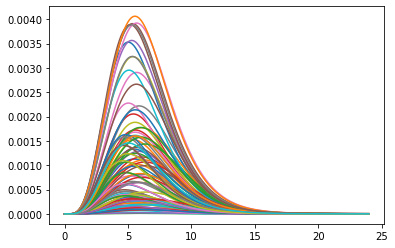

In [4]:
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    plt.plot(ode_data.time, ode_data.bcar)

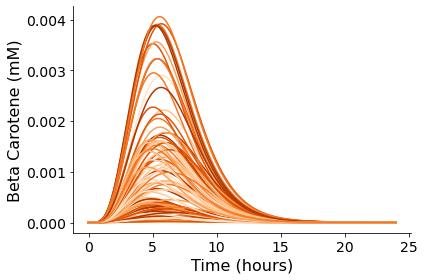

In [18]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

Text(0.5, 1.0, 'FPP')

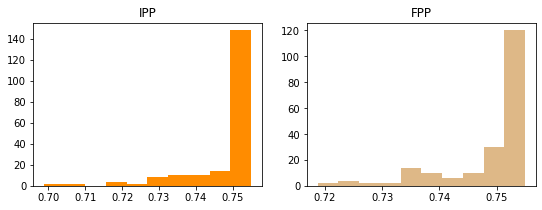

In [64]:
fig, ax = plt.subplots(1, 2,figsize=(9, 3))
ax[0].hist(list(ode_data_total.loc[ode_data_total.time == 0].ipp), color='darkorange')
ax[0].set_title('IPP')
ax[1].hist(list(ode_data_total.loc[ode_data_total.time == 0].fpp), color='burlywood')
ax[1].set_title('FPP')

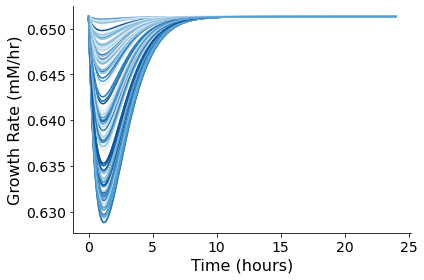

In [27]:
###FIGURE: Growth rate curve visualization
sns.set_palette("Blues")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Growth Rate (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w]
    ax.plot(fba_data.time, fba_data.lam)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

In [29]:
#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)

Coefficient of determination:  0.30023180362011503


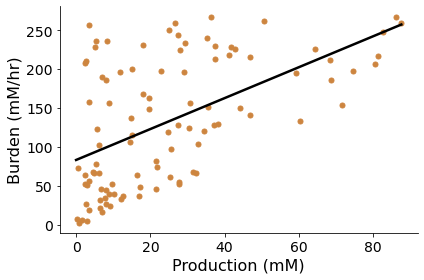

In [70]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_total.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
b, a = np.polyfit(sum_data_total.bcar_tot, burdens, deg=1)
xseq = np.linspace(0, max(sum_data_total.bcar_tot), num=100)
ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
coefficient_of_dermination = r2_score(burdens, a + b * sum_data_total.bcar_tot)
print('Coefficient of determination: ', coefficient_of_dermination)
fig.tight_layout()


In [75]:
ode_data_highic = pd.read_csv("exp_data/sim_ode_data_highic.csv")
sum_data_highic = pd.read_csv("exp_data/sum_data_highic.csv")
fba_data_highic = pd.read_csv("exp_data/sim_fba_data_highic.csv")

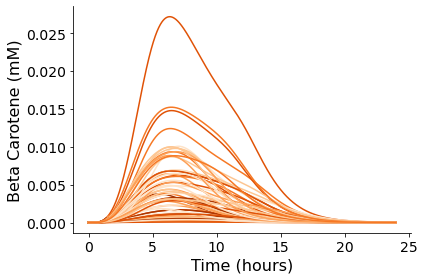

In [76]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_highic.W.unique():
    ode_data = ode_data_highic.loc[ode_data_highic.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

Coefficient of determination:  0.34307531231821486


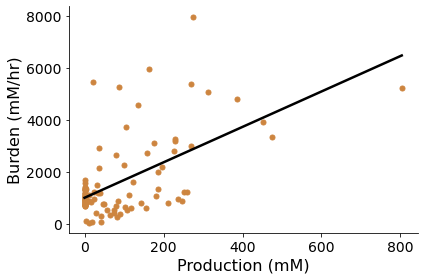

In [77]:
#compute sum under lam curve
burdens = []
for w in fba_data_highic.W.unique():
    fba_data = fba_data_highic.loc[fba_data_highic.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)

###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_highic.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
b, a = np.polyfit(sum_data_highic.bcar_tot, burdens, deg=1)
xseq = np.linspace(0, max(sum_data_highic.bcar_tot), num=100)
ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
coefficient_of_dermination = r2_score(burdens, a + b * sum_data_highic.bcar_tot)
print('Coefficient of determination: ', coefficient_of_dermination)
fig.tight_layout()


Coefficient of determination:  0.04721343062595729


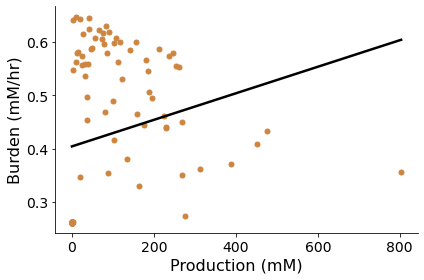

In [78]:
#compute sum under lam curve
burdens = []
for w in fba_data_highic.W.unique():
    fba_data = fba_data_highic.loc[fba_data_highic.W == w].reset_index(drop=True)
    burden = min(fba_data.lam)
    burdens.append(burden)




Coefficient of determination:  0.21728651735889604


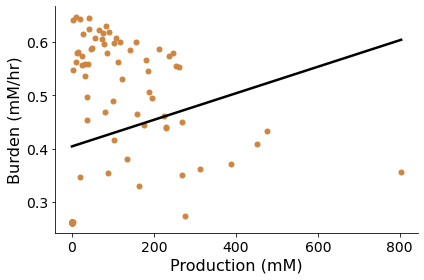

In [88]:
###FIGURE: Burden vs. production
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)

ax.plot(sum_data_highic.bcar_tot, burdens, '.', c='peru', ms=10)
#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(sum_data_highic.bcar_tot, burdens)

xseq = np.linspace(0, max(sum_data_highic.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Coefficient of determination: ', r_value)
fig.tight_layout()

In [3]:
###Long BayesOpt results
fba_data_total = pd.read_csv("exp_data/long_bo/sim_fba_data_long_bo.csv")
ode_data_total = pd.read_csv("exp_data/long_bo/sim_ode_data_long_bo.csv")
sum_data_total = pd.read_csv("exp_data/long_bo/sum_data_long_bo.csv")

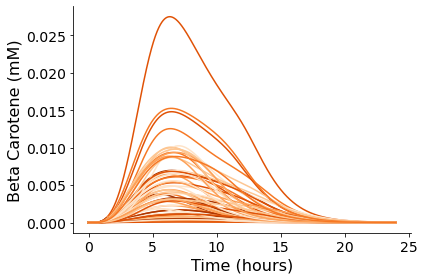

In [4]:
###FIGURE: Product curve visualization
sns.set_palette("Oranges")
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Time (hours)', fontsize=16)
ax.set_ylabel('Beta Carotene (mM)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
for w in ode_data_total.W.unique():
    ode_data = ode_data_total.loc[ode_data_total.W == w]
    ax.plot(ode_data.time, ode_data.bcar)
fig.tight_layout()
#if save_figs: fig.savefig('../figs/fatty_acid_pareto_curve.png', dpi=500)

In [16]:
#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)
sum_data_total['burden'] = burdens

Coefficient of determination:  0.5881923676811542


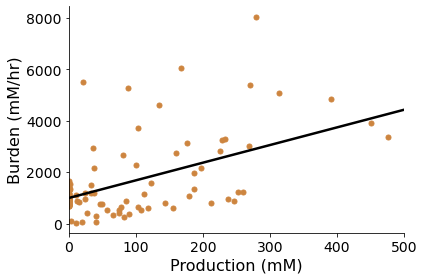

In [25]:
###FIGURE: Burden vs. production
#Remove no-production samples
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
#Plot linear regression line
# b, a = np.polyfit(sum_data_total.bcar_tot, burdens, deg=1)
# xseq = np.linspace(0, max(sum_data_total.bcar_tot), num=100)
# ax.plot(xseq, a + b * xseq, c='black', lw=2.5)
# coefficient_of_dermination = r2_score(burdens, a + b * sum_data_total.bcar_tot)
# print('Coefficient of determination: ', coefficient_of_dermination)

#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(data.bcar_tot, data.burden)

xseq = np.linspace(0, max(data.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Pearson coefficient: ', r_value)
fig.tight_layout()


In [13]:
##N=1000 experiment analysis
sum_data_total = pd.DataFrame()
fba_data_total = pd.DataFrame()
ode_data_total = pd.DataFrame()

for n in range(9):
    sum_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sum_data_long_bo_"+str((n+1))+".csv")
    fba_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sim_fba_data_long_bo_"+str((n+1))+".csv")
    ode_data = pd.read_csv("exp_data/long_bo_"+str((n+1))+"/sim_ode_data_long_bo_"+str((n+1))+".csv")
    sum_data_total = pd.concat([sum_data_total, sum_data])
    fba_data_total = pd.concat([fba_data_total, fba_data])
    ode_data_total = pd.concat([ode_data_total, ode_data])

sum_data = pd.read_csv("exp_data/long_bo/sum_data_long_bo.csv")
fba_data = pd.read_csv("exp_data/long_bo/sim_fba_data_long_bo.csv")
ode_data = pd.read_csv("exp_data/long_bo/sim_ode_data_long_bo.csv")
sum_data_total = pd.concat([sum_data_total, sum_data])
fba_data_total = pd.concat([fba_data_total, fba_data])
ode_data_total = pd.concat([ode_data_total, ode_data])

#Read additional files N=285
sum_data = pd.read_csv("exp_data/long_bo_extra/sum_data_long_bo_extra.csv")
fba_data = pd.read_csv("exp_data/long_bo_extra/sim_fba_data_long_bo_extra.csv")
ode_data = pd.read_csv("exp_data/long_bo_extra/sim_ode_data_long_bo_extra.csv")
sum_data_total = pd.concat([sum_data_total, sum_data])
fba_data_total = pd.concat([fba_data_total, fba_data])
ode_data_total = pd.concat([ode_data_total, ode_data])

##Sanity check
len(ode_data_total.W.unique())

#compute sum under lam curve
burdens = []
for w in fba_data.W.unique():
    data = fba_data.loc[fba_data.W == w].reset_index(drop=True)
    burden = sum(data.lam[0] - data.lam)
    burdens.append(burden)
sum_data['burden'] = burdens

#Append to other csv and save out
sum_data_total = pd.concat([sum_data_total, sum_data])
sum_data_total.to_csv('exp_data/sum_data_long_bo_total.csv')

#compute sum under lam curve
burdens = []
for w in fba_data_total.W.unique():
    fba_data = fba_data_total.loc[fba_data_total.W == w].reset_index(drop=True)
    burden = sum(fba_data.lam[0] - fba_data.lam)
    burdens.append(burden)
sum_data_total['burden'] = burdens
sum_data_total.to_csv('exp_data/sum_data_long_bo_total.csv')

0
50
1
115
2
165
3
235
4
280
5
335
6
435
7
535
8
620


Pearson coefficient:  0.6399201125977304
R squared:  0.409497750507092


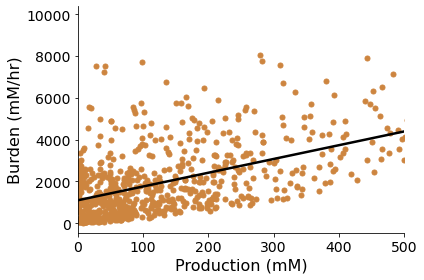

In [59]:
###FIGURE: Burden vs. production
#Remove no-production samples
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)

#Plot linear regression line
slope, intercept, r_value, p_value, std_err = linregress(data.bcar_tot, data.burden)

xseq = np.linspace(0, max(data.bcar_tot), num=100)
ax.plot(xseq, intercept + slope * xseq, c='black', lw=2.5)

print('Pearson coefficient: ', r_value)
print('R squared: ', r_value**2)
fig.tight_layout()


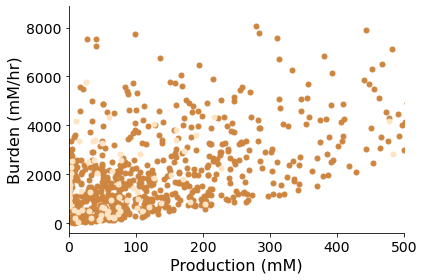

In [60]:
sum_data_ur = pd.read_csv("exp_data/ur_100/sum_data_ur_100.csv")
fba_data_ur = pd.read_csv("exp_data/ur_100/sim_fba_data_ur_100.csv")
ode_data_ur = pd.read_csv("exp_data/ur_100/sim_ode_data_ur_100.csv")

#compute sum under lam curve
burdens = []
for w in fba_data_ur.W.unique():
    data = fba_data_ur.loc[fba_data_ur.W == w].reset_index(drop=True)
    burden = sum(data.lam[0] - data.lam)
    burdens.append(burden)
sum_data_ur['burden'] = burdens

###FIGURE: Burden vs. production
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
ax.plot(sum_data_ur.bcar_tot, sum_data_ur.burden, '.', c='bisque', ms=10)
fig.tight_layout()

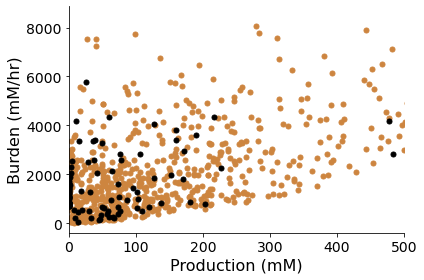

In [61]:
###FIGURE: Burden vs. production
data = sum_data_total
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot()
ax.set_xlabel('Production (mM)', fontsize=16)
ax.set_ylabel('Burden (mM/hr)', fontsize=16)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
for axis in ['top','right']:
    ax.spines[axis].set_linewidth(0)
ax.set_xlim([0, 500])
ax.plot(data.bcar_tot, data.burden, '.', c='peru', ms=10)
ax.plot(sum_data_ur.bcar_tot, sum_data_ur.burden, '.', c='black', ms=10)
fig.tight_layout()